In [860]:
import bs4 as bs
import pickle
import requests
import random

import datetime as dt
import os
import yfinance as yf
import re
import pandas as pd
from pylab import plt, mpl
import numpy as np
np.random.seed(100)
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
import tensorflow as tf
tf.random.set_seed(100)
from keras.layers import Dense
from keras.models import Sequential
#from keras.optimizers import Adam
from tensorflow.python.keras.optimizers import *
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
import requests
from collections import Counter
from sklearn import svm,  neighbors
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")
#import pandas_datareader.data as web


In [861]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)

    return tickers
        

In [862]:

tickers = save_sp500_tickers()
symbols = []
for string in tickers:
    new_string = string.replace("\n", "")
    new_string = new_string.replace(".", " ")
    symbols.append(new_string)


In [863]:
print(symbols)

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF B', 'CHRW', 'COG', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE'

In [864]:
# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock'):
        os.mkdir('stock')
    symbols = []
    for string in tickers:
        new_string = string.replace("\n", "")
        if new_string == 'BF.B':
            new_string = new_string.replace(".", "-")
        else:            
            new_string = new_string.replace(".", " ")
        symbols.append(new_string)

    for symbol in symbols:
        #if not os.path.exists(f"stock/{symbol}.csv"):
        data = yf.download(symbol, start="2010-01-01", end=dt.datetime.now())
        if data.size > 0:
            if re.search(r"\s", symbol):
                symbol = symbol.replace(" ", "")
                data.to_csv(f"stock/{symbol}.csv")
            else:
                data.to_csv(f"stock/{symbol}.csv")
        else:
            print("Not saving...")


    for symbol in symbols:
        s = open(f"stock/{symbol}.csv").readlines()
        if len(s) < 10:
            os.system(f"rm stock/{symbol}.csv")

In [865]:
get_data_from_yahoo()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

FileNotFoundError: [Errno 2] No such file or directory: 'stock/BRK B.csv'

In [866]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
        symbols = []
    symbols = []
    for string in tickers:
        new_string = string.replace("\n", "")
        if new_string == 'BF.B':
            new_string = new_string.replace(".", "-")
            
        else:            
            new_string = new_string.replace(".", " ")
        #print(new_string)
        symbols.append(new_string)
        
    tickers = symbols
    #print(tickers)
    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        if re.search(r"\s", ticker):
            ticker = ticker.replace(" ", "")
        df = pd.read_csv('stock/{}.csv'.format(ticker))
        list_columns = list (df.columns)
        if list_columns[0] =='Unnamed: 0':
            df= df.rename(columns={'Unnamed: 0': 'Date'})
        
        #print(ticker)
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        #if count % 10 == 0:
         #   print(count)
    print(main_df.head())
    main_df.to_csv('sp500_Final_Adj_close.csv')


compile_data()

                  MMM        ABT  ABBV  ABMD        ACN       ATVI       ADBE  \
Date                                                                            
NaN               NaN        NaN   NaN   NaN        NaN        NaN        NaN   
2010-01-04  60.840641  20.001087   NaN  8.74  33.614555  10.077828  37.090000   
2010-01-05  60.459545  19.839491   NaN  8.53  33.822308  10.095664  37.700001   
2010-01-06  61.316975  19.949661   NaN  8.40  34.181858  10.042155  37.619999   
2010-01-07  61.360966  20.114939   NaN  8.40  34.149891   9.801357  36.889999   

             AMD        AAP        AES  ...       WLTW       WYNN        XEL  \
Date                                    ...                                    
NaN          NaN        NaN        NaN  ...        NaN        NaN        NaN   
2010-01-04  9.70  39.049633  10.486463  ...  55.026779  41.963718  14.024924   
2010-01-05  9.71  38.817539  10.379069  ...  54.903427  44.515926  13.858594   
2010-01-06  9.57  39.156021  10.

In [916]:
df = pd.read_csv('sp500_Final_Adj_close.csv')
df.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

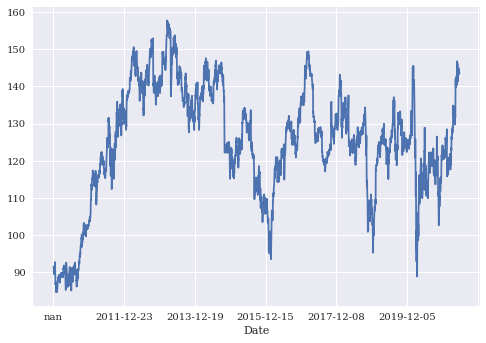

In [917]:
df['IBM'].plot()

In [918]:
# drop rows with all nan
# most likely correspond to weekends, holidays (non-trading days)
df = df[df.index.notnull()]
df.reset_index()
df.dropna(axis=0, how='all', inplace=True)
#df.set_index('Date',inplace=True)






In [919]:

df.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
       '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28'],
      dtype='object', name='Date', length=2871)

In [920]:
# no of missing values for each individual stock
df.isna().sum()

MMM       0
ABT       0
ABBV    754
ABMD      0
ACN       0
       ... 
YUM       0
ZBRA      0
ZBH       0
ZION      0
ZTS     775
Length: 511, dtype: int64

In [921]:
#How many missing values in total
df.isna().sum().sum()

58027

In [922]:
#Stocks which do not have initial value must be backward fill
df.iloc[0,:].isna().sum()
# 6 stocks does not have initial stock data. We need to fackfill those stocks

57

In [923]:
# But before we do the backward fill we need to do the forward fill
df.fillna(method='ffill', inplace=True)

In [924]:
df.isna().sum().sum()

55027

In [925]:
df.fillna(method='bfill', inplace=True)

In [926]:
df.isna().sum().sum()

0

In [927]:
# Plot the relative stock price of the stock compared to last day_price
df.iloc[0]



MMM     60.8406
ABT     20.0011
ABBV    24.8016
ABMD       8.74
ACN     33.6146
         ...   
YUM     20.1475
ZBRA      28.67
ZBH     55.2975
ZION     11.581
ZTS     29.1667
Name: 2010-01-04, Length: 511, dtype: object

In [928]:
def PD_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_Final_Adj_close.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df

In [929]:
df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,60.840641,20.001087,24.80158,8.74,33.614555,10.077828,37.090000,9.70,39.049633,10.486463,...,55.026779,41.963718,14.024924,19.830650,21.150721,20.147512,28.670000,55.297527,11.580979,29.16675
2010-01-05,60.459545,19.839491,24.80158,8.53,33.822308,10.095664,37.700001,9.71,38.817539,10.379069,...,54.903427,44.515926,13.858594,19.580618,21.150721,20.078602,28.620001,57.048023,11.989312,29.16675
2010-01-06,61.316975,19.949661,24.80158,8.40,34.181858,10.042155,37.619999,9.57,39.156021,10.271669,...,55.787331,43.932011,13.885209,19.447794,21.150721,19.935066,28.400000,57.029617,13.031859,29.16675
2010-01-07,61.360966,20.114939,24.80158,8.40,34.149891,9.801357,36.889999,9.47,39.146347,10.279343,...,55.622879,44.870213,13.825333,19.252451,21.150721,19.929327,27.690001,58.337891,14.491426,29.16675
2010-01-08,61.793331,20.217770,24.80158,8.23,34.014061,9.721090,36.689999,9.43,39.301067,10.570846,...,55.561218,44.548744,13.831985,19.533739,21.150721,19.935066,27.600000,57.112541,14.256856,29.16675


In [930]:
df = df.dropna()
df = df.drop (['BRKB','Adj Close.1','Close.1','High.1','Low.1','Open.1','Volume.1'],axis =1)
data = df

In [883]:
def add_lags(data, ric, lags, window=50):
    cols = []
    df = pd.DataFrame(data[ric])
    df.dropna(inplace=True)
    df['r'] = np.log((df / df.shift()))
    df['sma'] = df[ric].rolling(window).mean()
    df['min'] = df[ric].rolling(window).min()
    df['max'] = df[ric].rolling(window).max()
    df['mom'] = df['r'].rolling(window).mean()
    df['vol'] = df['r'].rolling(window).std()
    df.dropna(inplace=True)
    #df['d'] = np.where(df['r'] > 0, 1, 0)
    features = [ric,  'sma', 'min', 'max', 'mom', 'vol']
    for f in features:
        for lag in range(1, lags + 1):
            if f == ric:
                col = '{}_{}d'.format(ric, lag)
                df['{}_{}d'.format(ric, lag)] = (df[ric].shift(-lag) - df[ric]) / df[ric]
                #df[col] = 
                cols.append(col)
                #print(df['{}_{}d'.format(ric, lag)].head())
            else:
                col = f'{f}_lag_{lag}'
                df[col] = df[f].shift(lag)
                cols.append(col)
    df.dropna(inplace=True)
    return df, cols

In [884]:
dfs = {}
lags = 7
for sym in data.columns:
    if sym == 'BRKB' or sym == 'Adj Close.1' or sym == 'Close.1' or sym == 'High.1' or sym == 'Low.1' or sym == 'Open.1' or sym == 'Volume.1':
        pass
    else:
        df, cols = add_lags(data, sym, lags)
        dfs[sym] = df

In [800]:
dfs['AAPL'].to_csv('C://Users//umittal//Desktop//Deep learning//AAPL2.csv')

def buy_hold_sell(*args):
    """Buy if the stock has moved up ny 2%"""
    """Hold if no change"""
    """Sell if the stock dropped by 2%"""
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return 2  #sell the stock. Just to make sure that class is balanced
    return 0

In [885]:
def buy_hold_sell2(*args):
    """Buy if the stock has moved up ny 2%"""
    """Hold if no change"""
    """Sell if the stock dropped by 2%"""
    cols = [c for c in args]
    requirement = 0.02
    empt_list = []
    for col in cols:
        if col > requirement:
            empt_list.append (1)
        if col < -requirement:
            empt_list.append (-1)  #sell the stock. Just to make sure that class is balanced
        if col <= requirement and col >= -requirement :
            empt_list.append (0)
    empt_list = np.array(empt_list)
    unique, counts = np.unique(empt_list, return_counts=True)   
    prob = dict(zip(unique, counts))
    key_list = list(prob.keys())
    to_be_list = [1,0,-1]
    if len(key_list) == len(to_be_list):
        pass
    else:
        missing_key = np.setdiff1d(to_be_list,key_list)
        diff_list = len(to_be_list) - len(key_list)
        for i in range (0,diff_list):
            prob[missing_key[i]] = 0
    key_values = list(prob.values())
    max_value = max(key_values)
    #print(prob)
    prob_positive = prob[1]
    prob_negative = prob[-1]
    prob_zero = prob[0]
    if prob_positive == max_value:
        return 1
    if prob_negative  == max_value:
        return 2
      
    
    return 0

In [886]:
def max_buy_return(*args):
    """Buy if the stock has moved up ny 2%"""
    """Hold if no change"""
    """Sell if the stock dropped by 2%"""
    cols = [c for c in args]
    empt_list = []
    for col in cols:
        empt_list.append(col)
    max_return = max(empt_list)
    return max_return
        

# Create the decision variable based on stock movement in the last 7 days

In [887]:
def extract_featuresets(ticker,dfs):
    tickers, df = PD_labels(ticker)
    dfs[ticker]['{}_target'.format(ticker)] = list(map( buy_hold_sell2,
                                               dfs[ticker]['{}_1d'.format(ticker)],
                                               dfs[ticker]['{}_2d'.format(ticker)],
                                               dfs[ticker]['{}_3d'.format(ticker)],
                                               dfs[ticker]['{}_4d'.format(ticker)],
                                               dfs[ticker]['{}_5d'.format(ticker)],
                                               dfs[ticker]['{}_6d'.format(ticker)],
                                               dfs[ticker]['{}_7d'.format(ticker)]))


    
    vals = dfs[ticker]['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    dfs[ticker].fillna(0, inplace=True)
    dfs[ticker] = dfs[ticker].replace([np.inf, -np.inf], np.nan)
    dfs[ticker].dropna(inplace=True)
    df_columns = list(dfs[ticker].columns)

    df_vals = dfs[ticker][df_columns]
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    #X = df_vals.values
    #y = dfs[ticker]['{}_target'.format(ticker)].values
    return  dfs[ticker]

In [888]:
def Max_Return(ticker,df):
    
    r_max= list(map( max_buy_return,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))


    

    #X = df_vals.values
    #y = dfs[ticker]['{}_target'.format(ticker)].values
    return  r_max

# Base Model Voting Classifier SVM, and RandomForest

In [2013]:
def do_ml(ticker,dfs):
    df = extract_featuresets(ticker,dfs)
    #df['r_buy'] = Max_Return(ticker,df)
    df.dropna(inplace=True)
    split = int(len(df) * 0.7)
    #train = df.iloc[:split].copy()
    #test = df.iloc[split:].copy()
    train = data[data.index<'2018-01-01'].copy()
    test = data[(data.index>='2018-01-01') & (data.index<'2019-01-01')].copy()
    df_columns = list(df.columns)
    X_train, y_train =  train[df_columns], train['{}_target'.format(ticker)]
    
    X_train.drop (['{}_target'.format(ticker)],axis =1)
    X_test, y_test =  test[df_columns], test['{}_target'.format(ticker)]
    X_test.drop (['{}_target'.format(ticker)],axis =1)
    

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    print()

    clf = VotingClassifier([('lsvc', svm.LinearSVC(random_state = 0 , class_weight=cw2(y_train))),
                            #('xgboost', XGBClassifier(class_weight=cw2(y_train), random_state = 49)),
                            ('rfor', RandomForestClassifier( random_state = 0, class_weight=cw2(y_train)))])

    clf.fit(X_train, y_train)
    confidence_train = clf.score(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    p = clf.predict(X_test)
    
    test['p' ] = clf.predict(test[df_columns])
    #test['r_buy'] = Max_Return(ticker,test)
    #print(p)
    #test['p' ] = np.where(test['p' ] > 0.5, 1, np.where(test['p' ] == 0.5, 0, -1))
    #test['s'] = np.where (test['p' ]== 1, test['p'] *test['r_buy'],  np.where (test['p' ]== 2, test['r'],0))
    #perf = test[['r', 's']].sum().apply(np.exp)
    #perf = test[['r','s']].sum().apply(np.exp)
    #perf = test['s'].sum()
    #perf = np.exp(perf)
    #print(X_test)
    print('accuracy train:', confidence_train)
    print('accuracy test:', confidence)
    
    #print('predicted class counts:', Counter(predictions))
    print()
    print()
    mat = confusion_matrix(test['p' ], test['{}_target'.format(ticker)])
    font = {'family' : 'Serif',
        'size': 16   
    
    }
    matplotlib.rc('font', **font)

    plot_confusion_matrix(conf_mat = mat, figsize = (5,10), class_names= ['Hold','Buy','Sell'],show_normed= True)

    
    return  confidence
#('knn', neighbors.KNeighborsClassifier()),

Data spread: Counter({'0': 1695, '1': 658, '2': 454})

accuracy train: 0.8757668711656442
accuracy test: 0.5139442231075697




0.5139442231075697

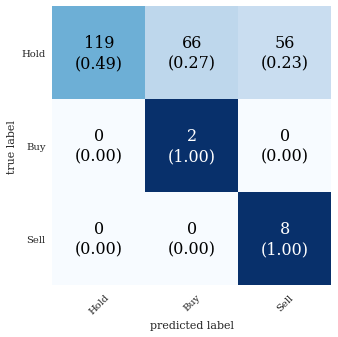

In [2014]:
do_ml('GOOG',dfs)

In [891]:
%%time
unique_class_list = ['Classifier','Test_Accuracy']
dx = pd.DataFrame( columns = unique_class_list)
for sym in data.columns:
    res =[]
    res.append('Voting_Classifier')
    #df = dfs[sym]
    
    return_,accuracy = do_ml(sym,dfs)
    res.append(return_)
    res.append(accuracy)

    
    df2 = pd.DataFrame ([res],columns = unique_class_list, index=[sym] )
    dx = dx.append(df2)
    
    

Data spread: Counter({'0': 1983, '1': 485, '2': 339})

accuracy: 0.9679715302491103


Data spread: Counter({'0': 1993, '1': 505, '2': 309})

accuracy: 0.8730723606168446


Data spread: Counter({'0': 1890, '1': 542, '2': 375})

accuracy: 0.8173190984578885


Data spread: Counter({'0': 1059, '1': 1056, '2': 692})

accuracy: 0.730723606168446


Data spread: Counter({'0': 1914, '1': 539, '2': 354})

accuracy: 0.7046263345195729


Data spread: Counter({'0': 1507, '1': 768, '2': 532})

accuracy: 0.867141162514828


Data spread: Counter({'0': 1592, '1': 770, '2': 445})

accuracy: 0.8066429418742586


Data spread: Counter({'1': 1117, '2': 926, '0': 764})

accuracy: 0.9822064056939501


Data spread: Counter({'0': 1599, '1': 696, '2': 512})

accuracy: 0.9833926453143536


Data spread: Counter({'0': 1574, '1': 720, '2': 513})

accuracy: 0.8932384341637011


Data spread: Counter({'0': 1907, '1': 521, '2': 379})

accuracy: 0.8018979833926453


Data spread: Counter({'0': 1571, '1': 746, '2': 490})



ValueError: not enough values to unpack (expected 3, got 1)

In [892]:
dx.head()

,Classifier,returns_,Test_Accuracy
MMM,Voting_Classifier,9.115382,0.967972
ABT,Voting_Classifier,10.130468,0.873072
ABBV,Voting_Classifier,13.113337,0.817319
ABMD,Voting_Classifier,27.112692,0.730724
ACN,Voting_Classifier,1.101589,0.704626


In [893]:
dx[['Test_Accuracy']].mean()

returns_         12.645640
Test_Accuracy     0.834485
dtype: float64

# Vanila Neural Network with less complexity

#### The following Python code uses the MLPClassifier class of scikit-learn which implements a DNN for class. DNNs are sometimes also called multi-layer perceptron (MLP).[4] The results are not perfect as the accuracy illustrate compared to traditional ML algorithms. But they are quite good already for the simple configuration used.

In [894]:
def create_model(problem='regression'):
    model = Sequential()
    model.add(Dense(512, input_dim=len(cols),
                    activation='relu'))
    if problem == 'regression':
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer='adam')
    else:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [895]:
model = create_model('classification')
def train_test_model(model):
    for ric in data.columns:
        print(ric)
        #df = dfs[ric]
        df = extract_featuresets(ric,dfs)
        print(df.head())
        cols = df.columns
        print(cols)
        split = int(len(df) * 0.85)
        train = df.iloc[:split].copy()
        #mu, std = train[cols].mean(), train[cols].std()
        #train[cols] = (train[cols] - mu) / std
        train.drop (['{}_target'.format(ric)],axis =1)
        model.fit(train[cols], train['{}_target'.format(ric)])
        test = df.iloc[split:].copy() 
        #test[cols] = (test[cols] - mu) / std
        pred = model.predict(test[cols])
        acc = accuracy_score(test['{}_target'.format(ric)], pred)
        test['p' ] = pred
        test['r_buy'] = Max_Return(ticker,test)
        #test['p' ] = np.where(test['p' ] > 0.5, 1, np.where(test['p' ] == 0.5, 0, -1))
        test['s'] = np.where (test['p' ]== 1, test['p'] *test['r_buy'],  np.where (test['p' ]== 2, test['r'],0))
        perf = test['s'].mean()
        #perf = np.exp(perf)
        res =[]
        res.append('Shallow_NN_Hidden_Layer1')
    #df = dfs[sym]
    
        #return_,accuracy = do_ml(sym,dfs)
        res.append(perf)
        res.append(acc)
        df2 = pd.DataFrame ([res],columns = unique_class_list, index=[ric] )
        dx = dx.append(df2)

    
    
    

In [896]:
from sklearn.neural_network import MLPClassifier

In [1894]:
def NN(model,ticker,dfs):
    df = extract_featuresets(ticker,dfs)
    split = int(len(df) * 0.8)
    train = df.iloc[:split].copy()
    test = df.iloc[split:].copy()
    df_columns = list(df.columns)
    X_train, y_train =  train[df_columns], train['{}_target'.format(ticker)]
    
    X_train.drop (['{}_target'.format(ticker)],axis =1)
    X_test, y_test =  test[df_columns], test['{}_target'.format(ticker)]
    X_test.drop (['{}_target'.format(ticker)],axis =1)
    

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    #print()

    clf = model
    clf.fit(X_train, y_train)
     
    confidence = clf.score(X_test, y_test)
    p = clf.predict(X_test)
    test['p' ] = clf.predict(test[df_columns])
    #test['r_buy'] = Max_Return(ticker,test)
    #print(p)
    #test['p' ] = np.where(test['p' ] > 0.5, 1, np.where(test['p' ] == 0.5, 0, -1))
    #test['s'] = np.where (test['p' ]== 1, test['p'] *test['r_buy'],  np.where (test['p' ]== 2, test['r'],0))
    #perf = test[['r', 's']].sum().apply(np.exp)
    #perf = test[['r','s']].sum().apply(np.exp)
    #perf = test['s'].sum()
    #perf = np.exp(perf)
    #print(X_test)
    confidence_train = clf.score(X_train, y_train)
    print('accuracy train:', confidence_train)
    print('accuracy:', confidence)
    
    #print('predicted class counts:', Counter(predictions))
    print()
    print()
    return  confidence

In [1895]:
model = MLPClassifier(hidden_layer_sizes=[512],
                          random_state=100,
                          max_iter=1000,
                          early_stopping=True,
                          validation_fraction=0.15,
                          shuffle=False)

NN(model,'GOOG',dfs)

Data spread: Counter({'0': 1695, '1': 658, '2': 454})
accuracy train: 0.6111358574610245
accuracy: 0.5747330960854092




0.5747330960854092

In [933]:
dx.drop(dx[dx['Classifier'] == 'MLP_Classifier'].index, inplace = True)

model = MLPClassifier(hidden_layer_sizes=[512],
                          random_state=100,
                          max_iter=1000,
                          early_stopping=True,
                          validation_fraction=0.15,
                          shuffle=False)
for sym in data.columns:
    res =[]
    res.append('MLP_Classifier')
    #df = dfs[sym]
    
    return_,accuracy = NN(model,sym,dfs)
    res.append(return_)
    res.append(accuracy)

    
    df2 = pd.DataFrame ([res],columns = unique_class_list, index=[sym] )
    dx = dx.append(df2)

Data spread: Counter({'0': 1983, '1': 485, '2': 339})

[0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 2
 2 2 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0
 2 2 2 0 2 0 0 2 2 2 2 2 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2
 0 0 1 1 1 0 0 0 0 0 0 0 0 2 2 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 2 2 2 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 

In [900]:
dx.loc[dx['Classifier'] == 'MLP_Classifier', ['returns_', 'Test_Accuracy']].mean()

returns_         11.883992
Test_Accuracy     0.778187
dtype: float64

In [533]:
dx.to_csv(r'C:\Users\umittal\Downloads\model.csv')

In [902]:
dx.tail()

,Classifier,returns_,Test_Accuracy
YUM,MLP_Classifier,4.360279,0.774614
ZBRA,MLP_Classifier,4.389845,0.417556
ZBH,MLP_Classifier,12.332475,0.803084
ZION,MLP_Classifier,18.641107,0.908660
ZTS,MLP_Classifier,-0.213839,0.741400


# Preparing data for Deep neural network

# Class imbalance

In [903]:
"""A major problem in classification that can arise depending on the data set available is class imbalance. 
This means, in the context of binary labels, that the frequency of one particular class compared to the other class might be (much) higher. This might lead to situations in which the neural network simply predicts the class with the higher frequency since this already can lead to low loss and high accuracy values. 
Applying appropriate weights, one can make sure that both classes gain equal importance during the DNN training step"""

'A major problem in classification that can arise depending on the data set available is class imbalance. \nThis means, in the context of binary labels, that the frequency of one particular class compared to the other class might be (much) higher. This might lead to situations in which the neural network simply predicts the class with the higher frequency since this already can lead to low loss and high accuracy values. \nApplying appropriate weights, one can make sure that both classes gain equal importance during the DNN training step'

In [1857]:
def cw2(df):  
    c0, c1,c2 = np.bincount(df)
    w0 = (1 / c0) * (len(df)) / 3
    w1 = (1 / c1) * (len(df)) / 3
    w2 = (1 / c2) * (len(df)) / 3
    return {0: w0, 1: w1, 2:w2}

### The creation of the DNN model with Keras and the training of the model

In [1862]:
def set_seeds(seed=100):
    random.seed(seed)  
    np.random.seed(seed)  
    tf.random.set_seed(seed)

In [1863]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [1864]:
def create_model_DNN(hl=2, hu=128, optimizer=optimizer):
    model = Sequential()
    model.add(Dense(hu, input_dim=X_train.shape[1],
                 activation='relu'))  
    for _ in range(hl):
        model.add(Dense(hu, activation='relu'))  
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(loss='binary_crossentropy',  
                               optimizer="adam",  
                               metrics=['accuracy'])  
    return model

In [1897]:
set_seeds()
ticker = 'GOOG'
data = dfs[ticker]

#data['{}'.format(ticker)] = 
model = create_model_DNN(hl=3, hu=128)
y= data['{}_target'.format(ticker)]
x = data.drop ('{}_target'.format(ticker), axis=1)
#series.drop(labels_col, axis=1)
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.2, random_state=0)
mu, std = X_train.mean(), X_train.std()
train_ = (X_train - mu) / std

#Y_train=np.where (Y_train==-1,2,Y_train)
#Y_valid=np.where (Y_valid==-1,2,Y_valid)
model.fit(train_, Y_train, epochs=40,verbose=False,class_weight=cw2(Y_train))
#model.summary()
# class_weight=cw(data,"AAPL")
confidence_train = model.evaluate(train_, Y_train)
print('accuracy train:', confidence_train)

confidence = model.evaluate(X_valid.values, Y_valid)
print("Accuracy:",confidence )

X_valid['p' ] = model.predict(X_valid.values)
#print (X_valid['p' ])
#X_valid['p' ] = np.where(X_valid['p' ] > 0.5, 1, np.where(X_valid['p' ] == 0.5, 0, -1))

#X_valid['r_buy'] = Max_Return(ticker,X_valid)
#print(p)
#test['p' ] = np.where(test['p' ] > 0.5, 1, np.where(test['p' ] == 0.5, 0, -1))
#X_valid['s'] = np.where (X_valid['p' ]== 1, X_valid['p'] *X_valid['r_buy'],  np.where (X_valid['p' ]== 2, X_valid['r'],0))

#X_valid['s'] = X_valid['p' ] * X_valid['r']
#print(X_valid['s'].sum())


71/71 [==============================] - 0s 598us/step - loss: -58983817216.0000 - accuracy: 0.2512
accuracy train: [-58983817216.0, 0.25122493505477905]
18/18 [==============================] - 0s 997us/step - loss: 982071443456.0000 - accuracy: 0.2527
Accuracy: [982071443456.0, 0.2526690363883972]


# Dropout

In [1866]:
from keras.layers import Dropout

In [1867]:
def create_model_dropout(hl=1, hu=128, dropout=True, rate=0.3, optimizer=optimizer):
    model = Sequential()
    model.add(Dense(hu, input_dim=X_train.shape[1],activation='relu'))
    if dropout:
        model.add(Dropout(rate, seed=100))
    for _ in range(hl):
        model.add(Dense(hu, activation='relu'))
        if dropout:
            model.add(Dropout(rate, seed=100))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer=optimizer,
                          metrics=['accuracy'])
    return model
            

In [1898]:
set_seeds()
data = dfs[ticker]
model = create_model_dropout(hl=5, hu=128, rate=0.4, optimizer="adam")
y= data['{}_target'.format(ticker)]
x = data.drop ('{}_target'.format(ticker), axis=1)
#series.drop(labels_col, axis=1)
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.2, random_state=0)
mu, std = X_train.mean(), X_train.std()
train_ = (X_train - mu) / std

#Y_train=np.where (Y_train==-1,2,Y_train)
#Y_valid=np.where (Y_valid==-1,2,Y_valid)
hist = model.fit(train_, Y_train, epochs=50,verbose=False,class_weight=cw2(Y_train))
model.summary()
# class_weight=cw(data,"AAPL")
confidence_train = model.evaluate(train_, Y_train)
print('accuracy train:', confidence_train)
confidence = model.evaluate(X_valid.values, Y_valid)
print("Accuracy:",confidence )
X_valid['p' ] = model.predict(X_valid.values)
#X_valid['r_buy'] = Max_Return(ticker,X_valid)
#X_valid['s'] = np.where (X_valid['p' ]== 1, X_valid['p'] *X_valid['r_buy'],  np.where (X_valid['p' ]== 2, X_valid['r'],0))
#X_valid['s'] = X_valid['p' ] * X_valid['r']
#print(X_valid['s'].sum())


Model: "sequential_203"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_615 (Dense)            (None, 128)               6400      
_________________________________________________________________
dropout_243 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_616 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_244 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_617 (Dense)            (None, 1)                 129       
_________________________________________________________________
dense_618 (Dense)            (None, 128)               256       
_________________________________________________________________
dropout_245 (Dropout)        (None, 128)            

# Regularization

In [1869]:
from keras.regularizers import l1, l2

In [1870]:
def create_model_Reg(hl=1, hu=128, dropout=False, rate=0.3, regularize=False, reg=l1(0.0005),optimizer = optimizer, input_dim=X_train.shape[1]):
    if not regularize:
        reg = None
    model = Sequential()
    model.add(Dense(hu, input_dim=input_dim,
                             activity_regularizer=reg,  
                             activation='relu'))
    if dropout:
        model.add(Dropout(rate, seed=100))
    for _ in range(hl):
        model.add(Dense(hu, activation='relu',
                                 activity_regularizer=reg))
        if dropout:
                     model.add(Dropout(rate, seed=100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,
                          metrics=['accuracy'])
    return model

In [1901]:
set_seeds()
data = dfs[ticker]
optimizer = "adam"
model = create_model_Reg(hl=3, hu=128, rate=0.3, regularize=True, optimizer = optimizer)
y= data['{}_target'.format(ticker)]
x = data.drop ('{}_target'.format(ticker), axis=1)
#series.drop(labels_col, axis=1)
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.2, random_state=0)

mu, std = X_train.mean(), X_train.std()
train_ = (X_train - mu) / std


################################################




##########################################################




hist = model.fit(train_, Y_train, epochs=50,verbose=False,class_weight=cw2(Y_train))
#
model.summary()
confidence_train = model.evaluate(train_, Y_train)
print('accuracy train:', confidence_train)
# class_weight=cw(data,"AAPL")
confidence = model.evaluate(X_valid.values, Y_valid)
print("Accuracy:",confidence )
X_valid['p' ] = model.predict(X_valid.values)
#X_valid['r_buy'] = Max_Return(ticker,X_valid)
#X_valid['s'] = np.where (X_valid['p' ]== 1, X_valid['p'] *X_valid['r_buy'],  np.where (X_valid['p' ]== 2, X_valid['r'],0))
#print(X_valid['s'].sum())

Model: "sequential_206"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_640 (Dense)            (None, 128)               6400      
_________________________________________________________________
dense_641 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_642 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_643 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_644 (Dense)            (None, 1)                 129       
Total params: 56,065
Trainable params: 56,065
Non-trainable params: 0
_________________________________________________________________
71/71 [==============================] - 0s 684us/step - loss: -143260975104.0000 - accuracy: 0.2486
accuracy trai

In [1873]:
import time
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adadelta',
                       'adam', 'adamax', 'nadam']
time
for optimizer in optimizers:
    t0 = time.time()
    model = create_model_Reg(hl=1, hu=128, rate=0.3, regularize=True, optimizer = optimizer)
    y= data['{}_target'.format(ticker)]
    x = data.drop ('{}_target'.format(ticker), axis=1)
    #series.drop(labels_col, axis=1)
    X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.2, random_state=0)
    mu, std = X_train.mean(), X_train.std()
    train_ = (X_train - mu) / std



    ################################################




    ##########################################################




    model.fit(train_, Y_train, epochs=50,verbose=False,class_weight=cw2(Y_train))
    t1 = time.time()
    t = t1 - t0
    acc_tr = model.evaluate(X_train.values, Y_train, verbose=False)[1]  
    acc_te = model.evaluate(X_valid.values, Y_valid, verbose=False)[1]  
    out = f'{optimizer:10s} | time[s]: {t:.4f} | in-sample={acc_tr:.4f}'
    out += f' | out-of-sample={acc_te:.4f}'
    print(out)
    #
    #model.summary()
    # class_weight=cw(data,"AAPL")
    confidence = model.evaluate(X_valid.values, Y_valid)
    print("Accuracy:",confidence )
    #X_valid['p' ] = model.predict(X_valid.values)
    #X_valid['r_buy'] = Max_Return(ticker,X_valid)
    #X_valid['s'] = np.where (X_valid['p' ]== 1, X_valid['p'] *X_valid['r_buy'],  np.where (X_valid['p' ]== 2, X_valid['r'],0))
    #print(X_valid['s'].sum())


sgd        | time[s]: 2.2348 | in-sample=0.6102 | out-of-sample=0.5783
18/18 [==============================] - 0s 469us/step - loss: nan - accuracy: 0.5783
Accuracy: [nan, 0.5782918334007263]
rmsprop    | time[s]: 2.5130 | in-sample=0.2298 | out-of-sample=0.2527
18/18 [==============================] - 0s 528us/step - loss: 1647296.1250 - accuracy: 0.2527
Accuracy: [1647296.125, 0.2526690363883972]
adagrad    | time[s]: 2.3331 | in-sample=0.2298 | out-of-sample=0.2527
18/18 [==============================] - 0s 469us/step - loss: 1937.1250 - accuracy: 0.2527
Accuracy: [1937.125, 0.2526690363883972]
adadelta   | time[s]: 2.4696 | in-sample=0.2298 | out-of-sample=0.2527
18/18 [==============================] - 0s 469us/step - loss: 153.4512 - accuracy: 0.2527
Accuracy: [153.45118713378906, 0.2526690363883972]
adam       | time[s]: 2.5657 | in-sample=0.6102 | out-of-sample=0.5783
18/18 [==============================] - 0s 528us/step - loss: 20099.7852 - accuracy: 0.5783
Accuracy: [20099

# RNN - Recurrent Neural network

In [1927]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import SimpleRNN, LSTM, Dense, GRU

In [1928]:
from sklearn.metrics import accuracy_score


# Creating Shallow RNN

In [1973]:
def prep_Data (ticker):
    data = dfs[ticker][['{}'.format(ticker), 'r', 'sma', 'min', 'max', 'mom', 'vol','{}_target'.format(ticker)]]
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)
    #split = int(len(data) * 0.8)
    #train = data.iloc[:split].copy()
    #y_target_train = train['{}_target'.format(ticker)]
    #train.drop(['{}_target'.format(ticker)],axis = 1)
    #mu, std = train.mean(), train.std()
    #train = (train - mu) / std
    #train['{}_target'.format('AAPL')]= y_target_train
    #test = data.iloc[split:].copy()
    #test.drop(['{}_target'.format(ticker)],axis = 1)
    #y_target_test = test['{}_target'.format(ticker)]
    #test = (test - mu) / std
    data_training = data[data.index<'2018-01-01'].copy()
    data_test = data[(data.index>='2018-01-01') & (data.index<'2019-01-01')].copy()
    y_train_class = data_training['{}_target'.format(ticker)]
    #print(y_train_class.head())
    data_training2 = data_training
    data_training = data_training.drop(['{}_target'.format(ticker)], axis = 1)
    
    scaler = MinMaxScaler()
    data_training = scaler.fit_transform(data_training)
    mu, std = data_training.mean(), data_training.std()
    #data_training = (data_training - mu) / std
    X_train = []
    y_train = []

    for i in range(7, data_training.shape[0]):
        X_train.append(data_training[i-7:i])
        y_train.append(data_training[i, 0])
        #y_train.append(y_train_class[i-7])

    X_train, y_train = np.array(X_train), np.array(y_train)
    past_7_days  = data[data.index<'2018-01-01'].tail(7)
    df = past_7_days.append(data_test, ignore_index = True)
    y_test_class = data_test['{}_target'.format(ticker)]
    df = df.drop(['{}_target'.format(ticker)], axis = 1)
    inputs = scaler.transform(df)
    #inputs = (df - mu) / std
    #inputs
    #df.head()

    X_test = []
    y_test = []

    for i in range(7, inputs.shape[0]):
        X_test.append(inputs[i-7:i])
        y_test.append(inputs[i, 0])
        #y_test.append(y_test_class[i-7])

    X_test, y_test = np.array(X_test), np.array(y_test)
    return X_train, y_train,X_test, y_test, data_test,data_training2

In [1974]:
x_train_single, y_train_single, X_test, y_test, data_test, data_training = prep_Data(ticker)
x_val_single, y_val_single = X_test, y_test

In [1975]:
print(x_train_single.shape)
print(y_train_single.shape)

(1949, 7, 7)
(1949,)


In [1789]:
BUFFER_SIZE = 300
BATCH_SIZE = 100

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

print(train_data_single)
print(val_data_single)

<RepeatDataset shapes: ((None, 7, 7), (None,)), types: (tf.float64, tf.float64)>
<RepeatDataset shapes: ((None, 7, 7), (None,)), types: (tf.float64, tf.float64)>


In [1755]:
# Model
EPOCHS = 100
STEPS_PER_EPOCH = 200
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=STEPS_PER_EPOCH,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/100
200/200 [==============================] - 6s 4ms/step - loss: 0.0273 - val_loss: 0.0395
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 0.0909
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.0241
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0270
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0258
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0269
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0158 - val_loss: 0.0205
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0240
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.0231
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0146 - val_lo

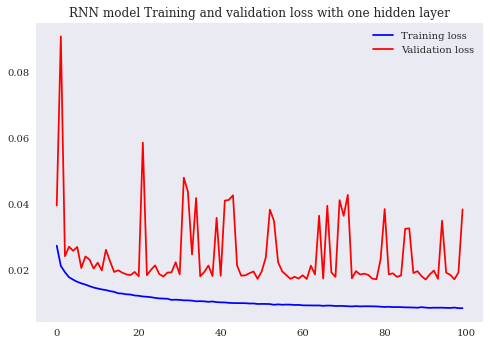

In [1890]:
# Plot train and validation loss over epochs

def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()
    plt.grid()

    plt.show()



plot_train_history(single_step_history,
                   'RNN model Training and validation loss with one hidden layer')

In [1757]:
y_pred = single_step_model.predict(x_val_single)

In [1758]:
#array_scale = list(scaler.scale_)
#scale = array_scale[0]
#y_pred = y_pred*scale
#y_test = y_val_single*scale

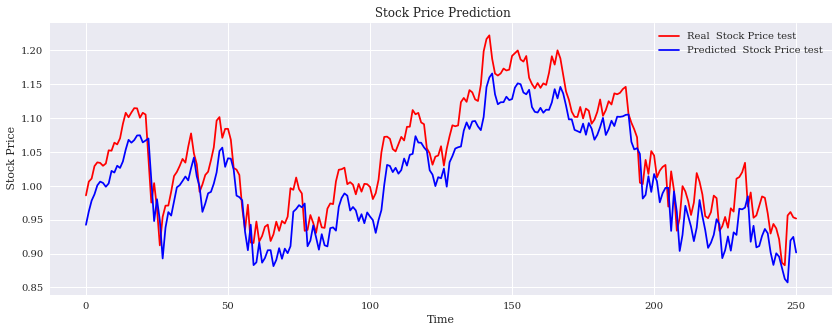

In [1888]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real {} Stock Price test'.format(""))
plt.plot(y_pred, color = 'blue', label = 'Predicted {} Stock Price test'.format(""))
#plt.plot(y_train, color = 'red', label = 'Real {} Stock Price train'.format(ticker))
#plt.plot(y_pred, color = 'blue', label = 'Predicted {} Stock Price test'.format('AAPL'))
plt.title('{} Stock Price Prediction'.format(""))
plt.xlabel('Time')
plt.ylabel('{} Stock Price'.format(""))
plt.legend()
plt.show()

In [1760]:
from sklearn.metrics import mean_absolute_error

In [1761]:
mean_absolute_error(y_pred, y_test)

0.0383479709815015

# Adding the Dropout layer

In [1837]:
# Model
EPOCHS = 100
STEPS_PER_EPOCH = 500
single_step_model2 = tf.keras.models.Sequential()
single_step_model2.add(tf.keras.layers.LSTM(units = 60, activation = 'relu', return_sequences = True,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model2.add(Dropout(0.3))
#single_step_model2.add(LSTM(units = 60, activation = 'relu'))
#single_step_model2.add(Dropout(0.2))


#single_step_model2.add(tf.keras.layers.LSTM(20))
#single_step_model2.add(Dropout(0.3))

#single_step_model2.add(tf.keras.layers.LSTM(20))
#single_step_model2.add(Dropout(0.3))

single_step_model2.add(tf.keras.layers.LSTM(32,activation = 'relu'))
single_step_model2.add(Dropout(0.3))

#single_step_model2.add(tf.keras.layers.LSTM(32,activation = 'tanh'))
#single_step_model2.add(Dropout(0.3))


single_step_model2.add(tf.keras.layers.Dense(1))

single_step_model2.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

single_step_history2 = single_step_model2.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=STEPS_PER_EPOCH,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/100
500/500 [==============================] - 4s 5ms/step - loss: 0.0563 - val_loss: 0.0396
Epoch 2/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0441 - val_loss: 0.0333
Epoch 3/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0401 - val_loss: 0.0870
Epoch 4/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0384 - val_loss: 0.1797
Epoch 5/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0375 - val_loss: 0.0347
Epoch 6/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0367 - val_loss: 0.0590
Epoch 7/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0365 - val_loss: 0.0348
Epoch 8/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0362 - val_loss: 0.0345
Epoch 9/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0361 - val_loss: 0.0769
Epoch 10/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0357 - val_lo

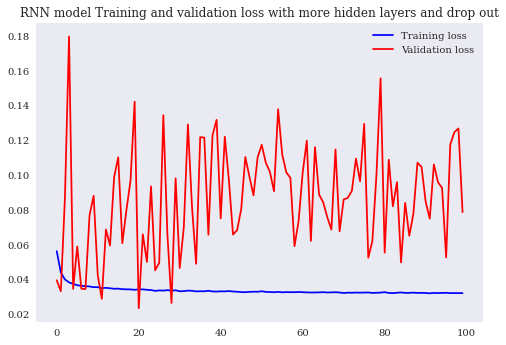

In [1889]:
plot_train_history(single_step_history2,
                   'RNN model Training and validation loss with more hidden layers and drop out')

In [1839]:
y_pred_dropout = single_step_model2.predict(x_val_single)

In [1840]:
y_pred_dropout.shape

(251, 1)

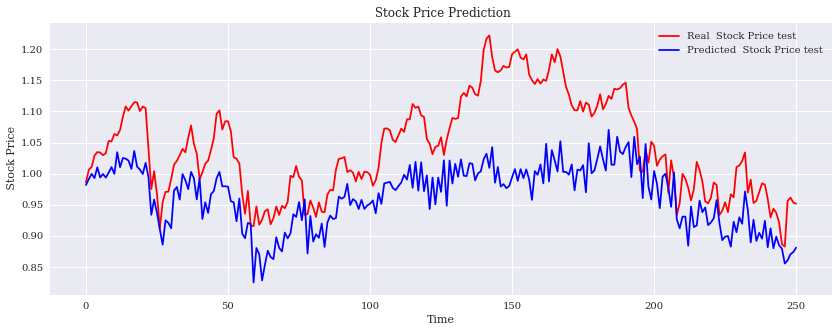

In [1891]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real {} Stock Price test'.format(""))
plt.plot(y_pred_dropout, color = 'blue', label = 'Predicted {} Stock Price test'.format(""))
#plt.plot(y_train, color = 'red', label = 'Real {} Stock Price train'.format(ticker))
#plt.plot(y_pred, color = 'blue', label = 'Predicted {} Stock Price test'.format('AAPL'))
plt.title('{} Stock Price Prediction'.format(""))
plt.xlabel('Time')
plt.ylabel('{} Stock Price'.format(""))
plt.legend()
plt.show()

## Adding the dropout layer doesn't help much. SImple RNN is better 

# Simple RNN train dataset error analysis

In [1976]:
y_pred_train = single_step_model.predict(x_train_single)

In [1977]:
data_training = data_training[7:]

In [1978]:
data_training['{}_pred'.format(ticker)] = y_pred_train * (max(data_training['{}'.format(ticker)]) - min(data_training['{}'.format(ticker)])) + min(data_training['{}'.format(ticker)])

In [1979]:
data_training_class_pred,_ = add_lags_pred(data_training, ric=ticker, lags=7)

In [1980]:
data_training_class_pred['{}_target_pred'.format(ticker)] = list(map( buy_hold_sell2,
                                           data_training_class_pred['{}_1d_pred'.format(ticker)],
                                           data_training_class_pred['{}_2d_pred'.format(ticker)],
                                           data_training_class_pred['{}_3d_pred'.format(ticker)],
                                           data_training_class_pred['{}_4d_pred'.format(ticker)],
                                           data_training_class_pred['{}_5d_pred'.format(ticker)],
                                           data_training_class_pred['{}_6d_pred'.format(ticker)],
                                           data_training_class_pred['{}_7d_pred'.format(ticker)]))

In [1981]:
accuracy_score(data_training_class_pred['{}_target'.format(ticker)], data_training_class_pred['{}_target_pred'.format(ticker)])

0.7615859938208033

# Simple RNN test dataset error analysis

In [1982]:
data_test['{}_pred'.format(ticker)] = y_pred * (max(data_training['{}'.format(ticker)]) - min(data_training['{}'.format(ticker)])) + min(data_training['{}'.format(ticker)]) 

In [1983]:
data_test['{}_test_Scale'.format(ticker)] = y_test * (max(data_training['{}'.format(ticker)]) - min(data_training['{}'.format(ticker)])) + min(data_training['{}'.format(ticker)]) 

In [1984]:
def add_lags_pred(data, ric=ticker, lags=7):
    cols = []
    df = pd.DataFrame(data)
    df.dropna(inplace=True)
    #df['d'] = np.where(df['r'] > 0, 1, 0)
    features = [ric]
    for f in features:
        for lag in range(1, lags + 1):
            if f == ric:
                col = '{}_{}d_pred'.format(ric, lag)
                df['{}_{}d_pred'.format(ric, lag)] = (data['{}_pred'.format(ticker)].shift(-lag) - data['{}_pred'.format(ticker)]) / data['{}_pred'.format(ticker)]
                #df[col] = 
                cols.append(col)
                #print(df['{}_{}d'.format(ric, lag)].head())
            else:
                col = f'{f}_lag_{lag}'
                df[col] = df[f].shift(lag)
                cols.append(col)
    df.dropna(inplace=True)
    return df, cols

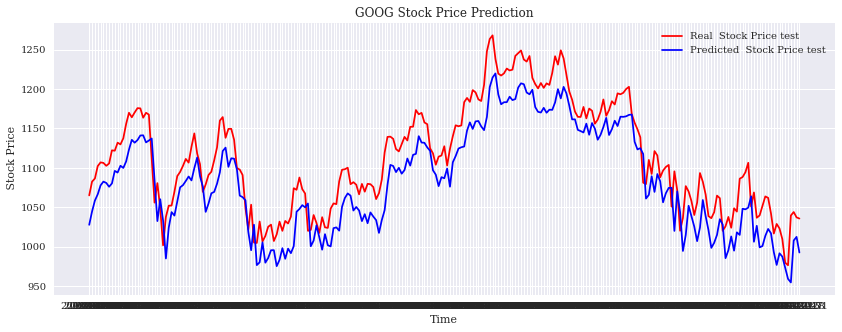

In [1988]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(data_test['{}_test_Scale'.format(ticker)], color = 'red', label = 'Real {} Stock Price test'.format(""))
plt.plot(data_test['{}_pred'.format(ticker)], color = 'blue', label = 'Predicted {} Stock Price test'.format(""))
#plt.plot(y_train, color = 'red', label = 'Real {} Stock Price train'.format(ticker))
#plt.plot(y_pred, color = 'blue', label = 'Predicted {} Stock Price test'.format('AAPL'))
plt.title('{} Stock Price Prediction'.format(ticker))
plt.xlabel('Time')
plt.ylabel('{} Stock Price'.format(""))
plt.legend()
plt.show()

In [1985]:
data_test_class_pred,_ = add_lags_pred(data_test, ric=ticker, lags=7)

In [1986]:
data_test_class_pred['{}_target_pred'.format(ticker)] = list(map( buy_hold_sell2,
                                           data_test_class_pred['{}_1d_pred'.format(ticker)],
                                           data_test_class_pred['{}_2d_pred'.format(ticker)],
                                           data_test_class_pred['{}_3d_pred'.format(ticker)],
                                           data_test_class_pred['{}_4d_pred'.format(ticker)],
                                           data_test_class_pred['{}_5d_pred'.format(ticker)],
                                           data_test_class_pred['{}_6d_pred'.format(ticker)],
                                           data_test_class_pred['{}_7d_pred'.format(ticker)]))


In [1962]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [1963]:
confusion_matrix(data_test_class_pred['{}_target'.format(ticker)], data_test_class_pred['{}_target_pred'.format(ticker)])

array([[75, 20, 23],
       [37, 22,  3],
       [25,  3, 36]], dtype=int64)

In [1964]:
accuracy_score(data_test_class_pred['{}_target'.format(ticker)], data_test_class_pred['{}_target_pred'.format(ticker)])

0.5450819672131147

In [1883]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib

In [1884]:
mat = confusion_matrix(data_test_class_pred['{}_target'.format(ticker)], data_test_class_pred['{}_target_pred'.format(ticker)])

(<Figure size 360x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

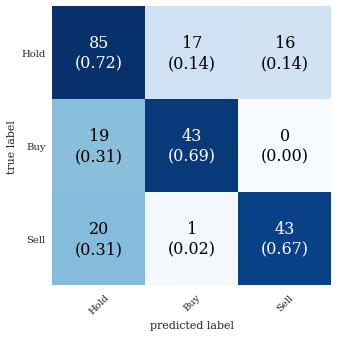

In [1886]:
font = {'family' : 'Serif',
        'size': 16   
    
}
matplotlib.rc('font', **font)

plot_confusion_matrix(conf_mat = mat, figsize = (5,10), class_names= ['Hold','Buy','Sell'],show_normed= True)